In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import pickle

df = pd.read_csv('C:/Everything/Data/Real-Data/real_Combine.csv')
x = df.iloc[:,:-1] #independent varible
y = df.iloc[:,-1] #dependent varible

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
2,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
3,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
4,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500


In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [4]:
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,30,33,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 33, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [5]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-2442.3991122546504


In [7]:
pred_ridge=ridge_regressor.predict(X_test)

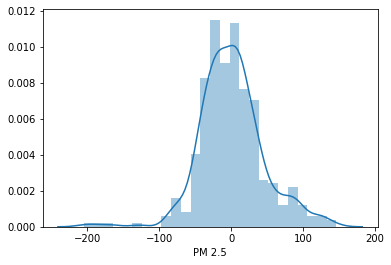

In [8]:
sns.distplot(y_test-pred_ridge)

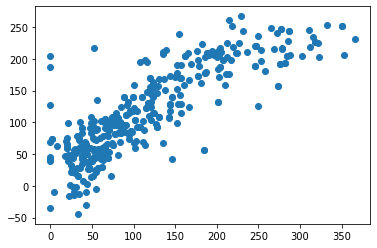

In [9]:
plt.scatter(y_test,pred_ridge)

In [12]:
#Evaluation metrics on ridge
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

MAE: 33.187283375772296
MSE: 2038.6860811721929
RMSE: 45.151811493806015


In [16]:
# open a file, where you ant to store the data
file = open('ridge_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(ridge_regressor, file)